In [1]:
from flygym.mujoco.arena.food_sources import FoodSource
from flygym.mujoco.arena.food_environment import OdorArenaEnriched
import numpy as np
import os
from pathlib import Path
import logging
import random
from tqdm import trange
from flygym.mujoco.arena import OdorArenaEnriched, change_rgba
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from flygym.mujoco import Parameters
from flygym.mujoco.examples.turning_controller import HybridTurningNMF


# Odor source: array of shape (num_odor_sources, 3) - xyz coords of odor sources
sources = [
    FoodSource([24, 0, 1.5], [1, 3], 12, change_rgba([255, 127, 14, 1])),
    FoodSource([8, -4, 1.5], [3, 7], 10, change_rgba([31, 119, 180, 1])),
    FoodSource([16, 4, 1.5], [2, 6], 10, change_rgba([255, 192, 203, 1])),
    FoodSource([12, -8, 1.5], [5, 3], 17, change_rgba([255, 0, 0, 1])),
    FoodSource([20, 3, 1.5], [9, 3], 20, change_rgba([0, 255, 0, 1])),
]

logging.basicConfig(level=logging.INFO)

In [2]:
# Set up the arena
arena = OdorArenaEnriched(
    food_sources=sources,
    size=(50, 50),
    diffuse_func=lambda x: x**-2,
    marker_size=0.3,
    key_angle=True,  # we add this boolean so that we compute the key for the valence dictionary by using the angle formed in the complex plane
)
# Add the NeuroMechFLy
contact_sensor_placements = [
    f"{leg}{segment}"
    for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    for segment in ["Tibia", "Tarsus1", "Tarsus2", "Tarsus3", "Tarsus4", "Tarsus5"]
]
sim_params = Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.5,
    render_window_size=(800, 608),
    enable_olfaction=True,
    enable_adhesion=True,
    draw_adhesion=False,
    render_camera="birdeye_cam",
)
sim = HybridTurningNMF(
    sim_params=sim_params,
    arena=arena,
    spawn_pos=(0, 0, 0.2),
    contact_sensor_placements=contact_sensor_placements,
    simulation_time=140,
)

In [3]:
obs, _ = sim.respawn()

In [4]:
source = sim.compute_closest_source(obs, True)
print(source)

0
1
2
3
4
1


In [22]:
source = sim.compute_closest_source(obs, True)
print(source)

0
1
2
3
4
5
6
6


In [6]:
source = sim.arena.compute_richest_closest_source(obs, True)
print(source)

{0.32175055439664224: 10, 0.4048917862850834: 10, 1.0303768265243125: 17, 1.2490457723982544: 20}
4
4


In [23]:
source = sim.arena.compute_richest_closest_source(obs, True)
print(source)

{0.32175055439664224: 0, 0.4048917862850834: 10, 1.0303768265243125: 17, 1.2490457723982544: 20, 1.1659045405098132: 12}
4
4


In [8]:
source = sim.choose_angle_key_odor_exploration()

[0 0 0 0]


In [24]:
source = sim.choose_angle_key_odor_exploration()
print(source)

[ 0.  0. 14.  0. 12.]
3


In [28]:
control_signal = sim.arena.generate_specific_turning_control(0, sim)
print(control_signal)

[0.99968223 1.        ]


In [19]:
sim.update_odor_scores_key(source)

{0.32175055439664224: 0, 0.4048917862850834: 0, 1.0303768265243125: 14.0, 1.2490457723982544: 0}


In [4]:
len(arena.odor_source)

5

In [5]:
sim.add_source()

{0.32175055439664224: 10, 0.4048917862850834: 10, 1.0303768265243125: 17, 1.2490457723982544: 20, 0.6202494859828215: 3} {0.6202494859828215: 3} {0.32175055439664224: 0, 0.4048917862850834: 0, 1.0303768265243125: 0, 1.2490457723982544: 0, 0.6202494859828215: 3}


In [6]:
len(arena.odor_source)

6

In [20]:
sim.arena.move_source(source)

{0.32175055439664224: 10, 0.4048917862850834: 10, 1.0303768265243125: 17, 1.2490457723982544: 20, 0.7086262721276703: 15} {0.7086262721276703: 15} {0.32175055439664224: 0, 0.4048917862850834: 0, 1.0303768265243125: 0, 1.2490457723982544: 0, 0.7086262721276703: 15}


(-0.5, 799.5, 607.5, -0.5)

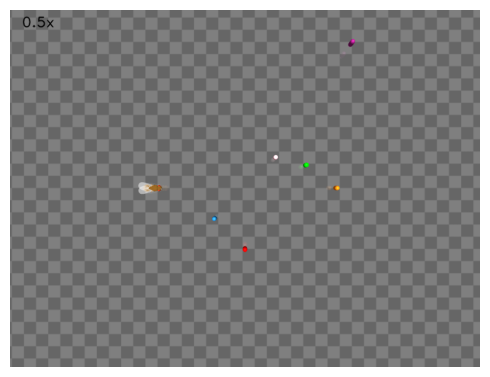

In [3]:
# sim.add_source(FoodSource([15, 10, 1.5], [6, 3], 8, change_rgba([15, 145, 67, 1])))
sim.add_source()

for i in range(100):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")
# fig.savefig("./outputs/olfaction_env.png")

(-0.5, 799.5, 607.5, -0.5)

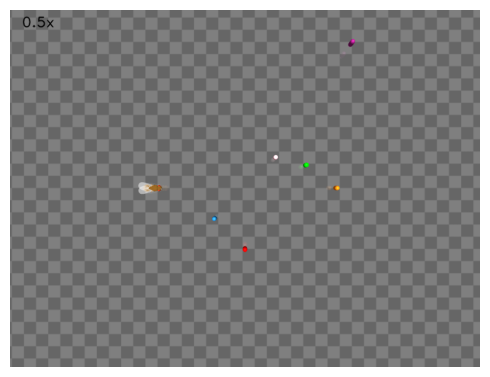

In [4]:
sim.arena.move_source(1, [0, 0, 1.5])
for i in range(1):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")